# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [2]:
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [3]:
df = pd.read_csv("EasyVisa.csv")

## Data Overview

- Observations
- Sanity checks

In [3]:
df.shape

(25480, 12)

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
df.dtypes

case_id                   object
continent                 object
education_of_employee     object
has_job_experience        object
requires_job_training     object
no_of_employees            int64
yr_of_estab                int64
region_of_employment      object
prevailing_wage          float64
unit_of_wage              object
full_time_position        object
case_status               object
dtype: object

In [6]:
df.describe(include=['O']).T

,count,unique,top,freq
case_id,25480,25480,EZYV15872,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


In [8]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [10]:
df1 = df[['continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training',
       'region_of_employment',
       'full_time_position', 'case_status']]

In [11]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

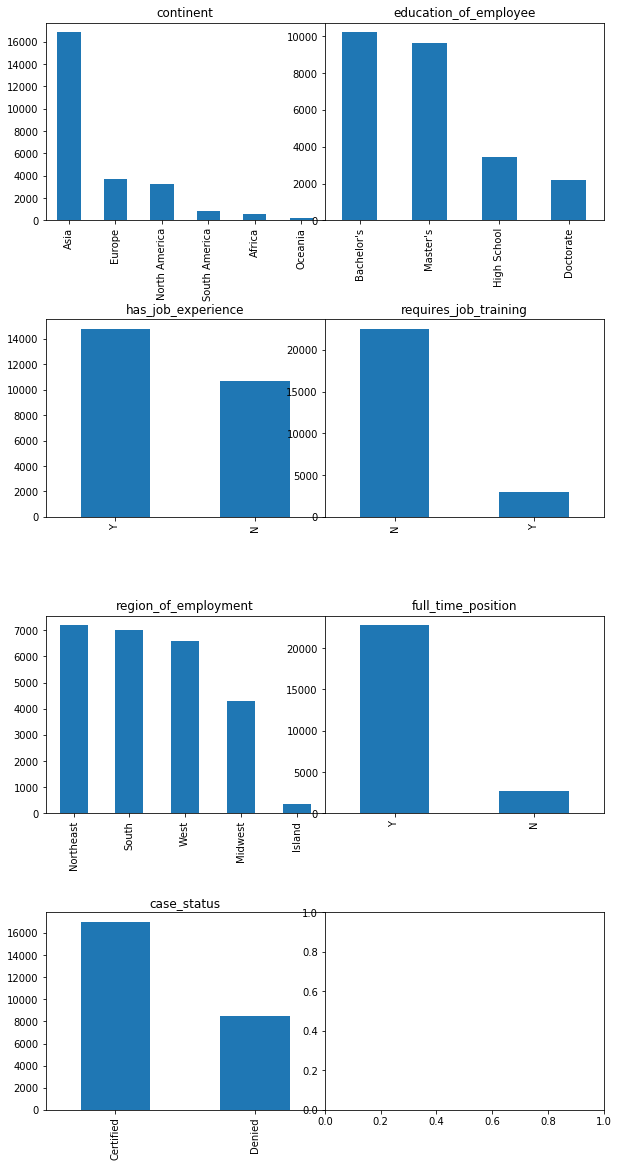

In [14]:
fig, axs = plt.subplots(4,2, figsize=(10, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.001)

axs = axs.ravel()
for i,x in enumerate(df1.columns):
    df1[x].value_counts().plot(kind='bar',ax=axs[i])
    axs[i].set_title(x)

Observation: \
    1) High number of applicants from Asia Continent\
    2) Mostly Educations of applicants are Bachelor & Masters \
    3) Applicants doent need job training , applicants are with the prior experience for the job \
    4) The regions of the employer are from Noreast & South \
    5) Applicants are mostly applied for the full time position 

In [25]:
columns =['no_of_employees','yr_of_estab']

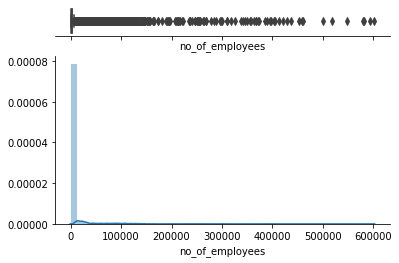

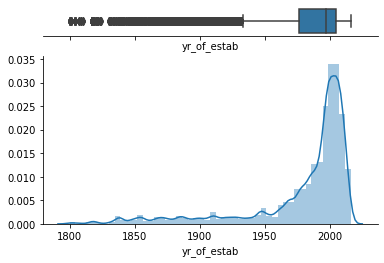

In [27]:

for col in columns:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(df[col], ax=ax_box)
    sns.distplot(df[col], ax=ax_hist)

    ax_box.set(yticks=[])
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

Observation: \
      1) Medain value for Years of establishments 1997   
    2) No of employees with mean 5667.043210  and median 2109.00

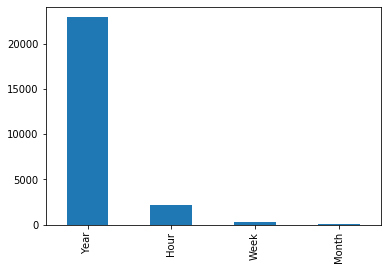

In [32]:
df['unit_of_wage'].value_counts().plot(kind='bar')

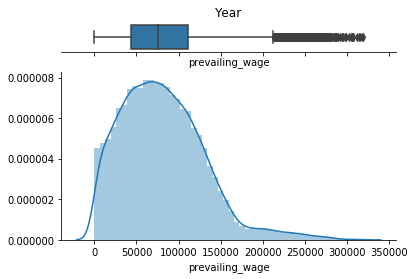

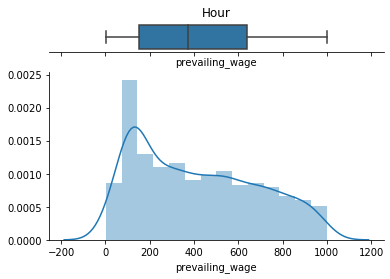

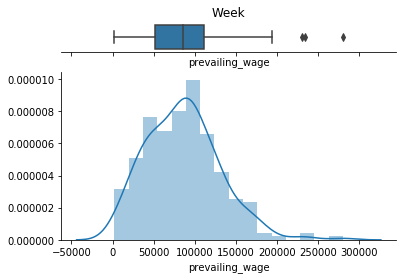

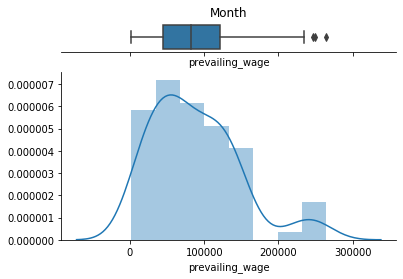

In [30]:
values=['Year','Hour','Week','Month']
for val in values:
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, 
                                    gridspec_kw={"height_ratios": (.15, .85)})

    sns.boxplot(df[df.unit_of_wage == val].prevailing_wage, ax=ax_box)
    sns.distplot(df[df.unit_of_wage == val].prevailing_wage, ax=ax_hist)

    ax_box.set(yticks=[])
    ax_box.set_title(val)
    sns.despine(ax=ax_hist)
    sns.despine(ax=ax_box, left=True)

Observations : \
    The wages are at different unit. Hours , week , month, Year \
    The hight number of unit of wages are Year
    

<function matplotlib.pyplot.show(*args, **kw)>

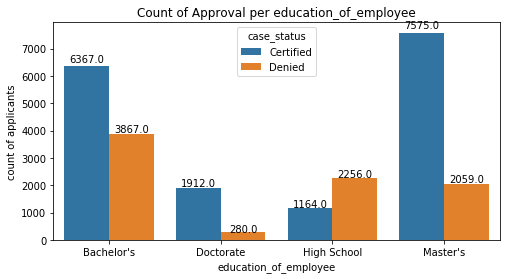

In [53]:
g1 = df[['education_of_employee','case_status','case_id']].groupby( [ "education_of_employee", "case_status"] , 
                                                                   as_index=False).count()
fig, ax = plt.subplots(figsize=(8, 4))  

sns.barplot(x="education_of_employee",y="case_id",hue="case_status",data=g1)
plt.title('Count of Approval per education_of_employee')
plt.xlabel('education_of_employee')
plt.ylabel('count of applicants')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
plt.show


Observation : \
    The visa status is rejected mostly with the applicants of High School. \
    The hiogher education level has probility of visa approval

<function matplotlib.pyplot.show(*args, **kw)>

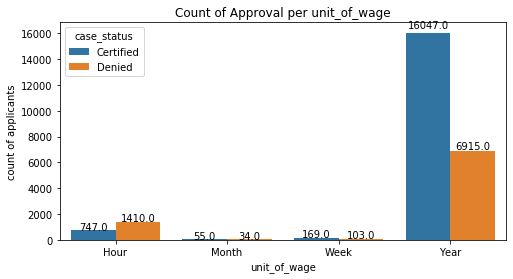

In [55]:
g1 = df[['unit_of_wage','case_status','case_id']].groupby( [ "unit_of_wage", "case_status"] , 
                                                                   as_index=False).count()
fig, ax = plt.subplots(figsize=(8, 4))  

sns.barplot(x="unit_of_wage",y="case_id",hue="case_status",data=g1)
plt.title('Count of Approval per unit_of_wage')
plt.xlabel('unit_of_wage')
plt.ylabel('count of applicants')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height*1.02), ha='center')
plt.show


Observations : \
    The unit of wage with year is most widely used for the applicants

Text(0.5, 0, 'Prevailing Wage')

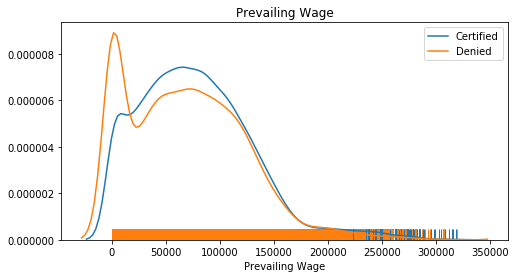

In [207]:
g1 = df[['education_of_employee','case_status','case_id']].groupby( [ "education_of_employee", "case_status"] , 
                                                                   as_index=False).count()
fig, ax = plt.subplots(figsize=(8, 4))  
sns.distplot(df[df.case_status == 'Certified'].prevailing_wage,label='Certified', hist=False, rug=True) 
sns.distplot(df[df.case_status == 'Denied'].prevailing_wage,label='Denied', hist=False, rug=True) 

plt.title('Prevailing Wage')
plt.xlabel('Prevailing Wage')


Observation : \
    the prevailing wage is more for certified applicants than the Denied applicants

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [80]:
df1=df[['no_of_employees','yr_of_estab']]

In [81]:
dummy=pd.get_dummies(df["continent"],prefix="continent")
df1=df1.merge(dummy,left_index=True,right_index=True)

dummy=pd.get_dummies(df["education_of_employee"],prefix="education_of_employee")
df1=df1.merge(dummy,left_index=True,right_index=True)

dummy=pd.get_dummies(df["unit_of_wage"],prefix="unit_of_wage")
df1=df1.merge(dummy,left_index=True,right_index=True)

dummy=pd.get_dummies(df["region_of_employment"],prefix="region_of_employment")
df1=df1.merge(dummy,left_index=True,right_index=True)

In [209]:
import numpy as np

In [213]:
np.arange(10,30,5)

array([10, 15, 20, 25])

In [82]:
dummy=df.has_job_experience.replace(to_replace=['Y', 'N'], value=[1, 0])
df1=df1.merge(dummy,left_index=True,right_index=True)

dummy=df.requires_job_training.replace(to_replace=['Y', 'N'], value=[1, 0])
df1=df1.merge(dummy,left_index=True,right_index=True)

dummy=df.full_time_position.replace(to_replace=['Y', 'N'], value=[1, 0])
df1=df1.merge(dummy,left_index=True,right_index=True)

dummy=df.case_status.replace(to_replace=['Certified', 'Denied'], value=[1, 0])
df1=df1.merge(dummy,left_index=True,right_index=True)

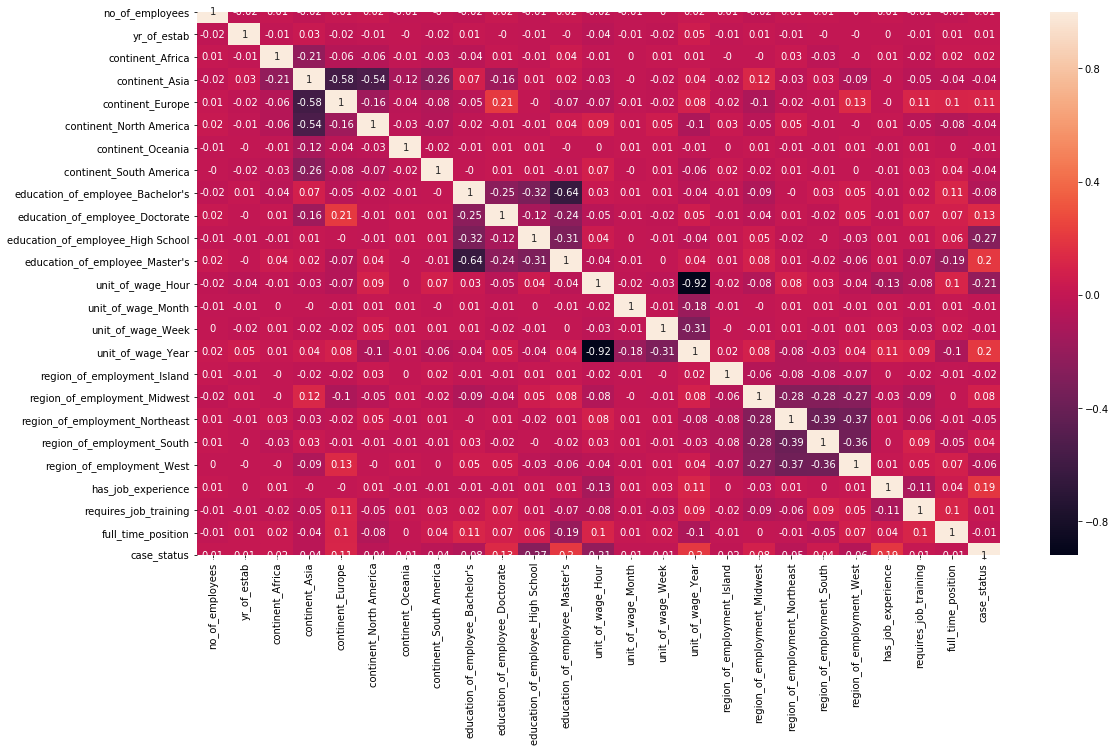

In [84]:
corr = round(df1.corr(),2)
fig, ax = plt.subplots(figsize=(18, 10)) 
sns.heatmap(corr,annot=True)

## Top 20 Features

In [85]:
X = df1.drop(['case_status'], axis=1)
# the dependent variable
y = df1[['case_status']]

/Users/sathya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


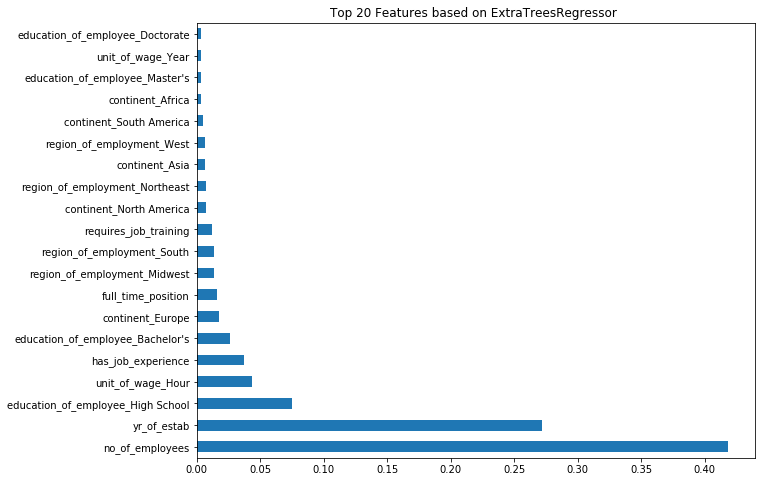

In [86]:

fig, ax = plt.subplots(figsize=(10, 8)) 
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)
plt.title('Top 20 Features based on ExtraTreesRegressor ', fontsize=12)
#print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
# calculates precision for 1:100 dataset with 90 tp and 30 fp
from sklearn.metrics import precision_score
# calculates recall for 1:100 dataset with 90 tp and 10 fn
from sklearn.metrics import recall_score

In [181]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [182]:
def roc(name):
    ns_probs = [0 for _ in range(len(y_test))]

    # predict probabilities
    lr_probs = clf.predict_proba(X_test)
    # keep probabilities for the positive outcome only
    lr_probs = lr_probs[:, 1]
    # calculate scores
    ns_auc = roc_auc_score(y_test, ns_probs)
    lr_auc = roc_auc_score(y_test, lr_probs)
    # summarize scores
    print('No Skill: ROC AUC=%.3f' % (ns_auc))
    print(name  ,': ROC AUC=%.3f' % (lr_auc))
    # calculate roc curves
    ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
    lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
    # plot the roc curve for the model
    pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
    pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
    # axis labels
    pyplot.xlabel('False Positive Rate')
    pyplot.ylabel('True Positive Rate')
    # show the legend
    pyplot.legend()
    # show the plot
    pyplot.show()
    return

In [183]:
def print_score(y_test,y_pred):
    print('Accuracy: %.3f' % accuracy_score(y_test, y_pred))
    print("F1 Score : " , f1_score(y_test, y_pred))
    precision = precision_score(y_test, y_pred, average='binary')
    print('Precision: %.3f' % precision)
    recall = recall_score(y_test, y_pred, average='binary')
    print('Recall: %.3f' % recall)
    return

## Building bagging and boosting models

## Model1 : Random Forest 

In [187]:

# Create training/ test data split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)
 
#
# Create an instance of Random Forest Classifier
#
forest = RandomForestClassifier(criterion='gini',
                                 n_estimators=5,
                                 random_state=1,
                                 n_jobs=2)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)

/Users/sathya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if sys.path[0] == '':


### Model Performance 

Accuracy: 0.690
F1 Score :  0.7727229192606072
Precision: 0.756
Recall: 0.790
No Skill: ROC AUC=0.500
Random Forest : ROC AUC=0.763


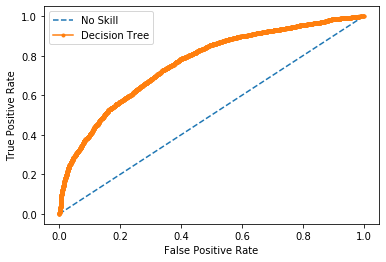

In [189]:
print_score(y_test,y_pred)
roc("Random Forest")

## Model 2 : Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier

In [190]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

Accuracy: 0.661
F1 Score :  0.7441585329784088
Precision: 0.749
Recall: 0.739
No Skill: ROC AUC=0.500
Decision Tree : ROC AUC=0.621


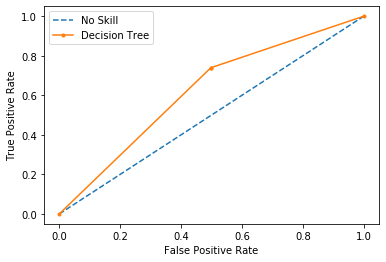

In [191]:
print_score(y_test,y_pred)
roc("Decision Tree")

## Model 3 : Logistic Regression

In [135]:
from sklearn.linear_model import LogisticRegression

In [198]:
model =  LogisticRegression()
model.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model.predict(X_test)

/Users/sathya/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.668
F1 Score :  0.8008471252647267
Precision: 0.668
Recall: 1.000
No Skill: ROC AUC=0.500
Logistic Regression : ROC AUC=0.621


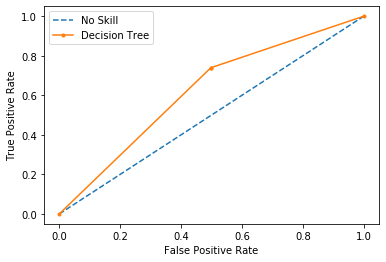

In [199]:

print_score(y_test,y_pred)
roc("Logistic Regression")

## Model 4 : Gradient Boosting

In [139]:
from sklearn.ensemble import GradientBoostingClassifier

In [200]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,
                 max_depth=1, random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

/Users/sathya/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.737
F1 Score :  0.8175473579262214
Precision: 0.761
Recall: 0.883
No Skill: ROC AUC=0.500
Gradient Boosting : ROC AUC=0.763


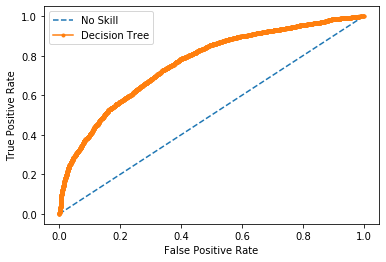

In [201]:

print_score(y_test,y_pred)
roc("Gradient Boosting")

##  Will tuning the hyperparameters improve the model performance?

## Random Forest Hyperparameters Tuning

In [116]:
param_grid = { 
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,6,7,8,15,25,30],
    'criterion' :['gini', 'entropy'],
    'min_samples_split' :[2, 10, 15, 100],
    'min_samples_leaf' :[1, 2, 5, 10]
}



In [117]:
rfc=RandomForestClassifier(random_state=42)

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train.values.ravel())

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [204]:
forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                              verbose=0, warm_start=False)

In [205]:
#
# Fit the model
#
forest.fit(X_train, y_train)
 
#
# Measure model performance
#
y_pred = forest.predict(X_test)

/Users/sathya/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Accuracy: 0.701
F1 Score :  0.7820952380952382
Precision: 0.761
Recall: 0.804
No Skill: ROC AUC=0.500
Tuned Random Forest : ROC AUC=0.763


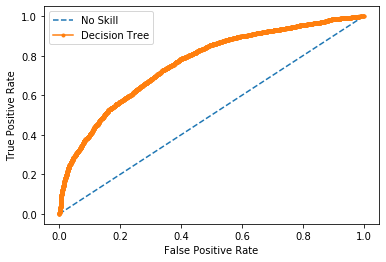

In [206]:
print_score(y_test,y_pred)
roc("Tuned Random Forest")

## Model Performance Comparison and Conclusions

| Sno | Model | Accuracy | Precision | Recall | F1_Score |
| --- | --- | --- | --- | --- | --- |
| 1 | Random Forest | 0.690 | 0.756 | 0.790 | 0.7727229192606072 |
| 2 | Decision Tree | 0.659 | 0.748 | 0.738 | 0.7431952662721892 |
| 3 | Logistic Regression | 0.668 | 0.668 | 1.0 | 0.8008471252647267 |
| 4 | Gradient Boosting | 0.737 | 0.761 | 0.883 | 0.8175473579262214 |
| 5 | Tuned Random Forest | 0.701 | 0.761 | 0.804| 0.7820952380952382 |



## Actionable Insights and Recommendations

The Gradient Boosting Model is choosed with F1 Score as 0.8175473579262214

The Following are the actioable Insights: \
    -> We can add additional features to the data set like Relevant Years of Experience \
    -> Field ofStudy can be included as part of education